In [1]:
# importing required libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read and load data
df = pd.read_csv("hotel_bookings.csv")

In [4]:
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [7]:
#The following columns previous_cancellations, previous_bookings_not_canceled, booking_changes days_in_waiting_list, required_car_parking_spaces, total_of_special_requests have only a maximum value. 
#This shows that these features contribute to the decision of cancellation only in very few cases

In [8]:
#data Preprocessing


In [9]:
#1.data cleaning

In [10]:
#missing value

#Checking if data holds any duplicate values.
df.duplicated().any()

True

In [11]:
#Pandas drop_duplicate() method helps to remove duplicate entries. 
#The keep parameter is set to False so that only Unique values are taken and the duplicate values are removed from the data.

#Droping Duplicate entries 
df.drop_duplicates(inplace= False)# will keep first row and others consider as duplicate

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

In [12]:
#checking null entries in each columns
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
#Mising values:

#country
#agent
#company

In [14]:
df.drop('company',axis=1, inplace = True)   # it will drop company column

In [15]:
# Check is there any missing values across each column

df.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
days_in_waiting_list              False


In [16]:
# Next way: Print the columns with missing values

[col for col in df.columns if df[col].isnull().any()]

['children', 'country', 'agent']

In [17]:
# Count missing values in the dataset

print(df.isnull().values.sum())

16832


In [18]:
#Missing
#The Missingno is the Python library compatible with pandas and has a really excellent visualization of the distribution of NaN values.
#This library is built on matplotlib thus any graphs it produces will be static

In [19]:
#Using Missingno library, we can depict missing values in many ways. here we will be generating:

#Bar Chart
#Heatmap
#Matrix
#Dendrogram

<Axes: >

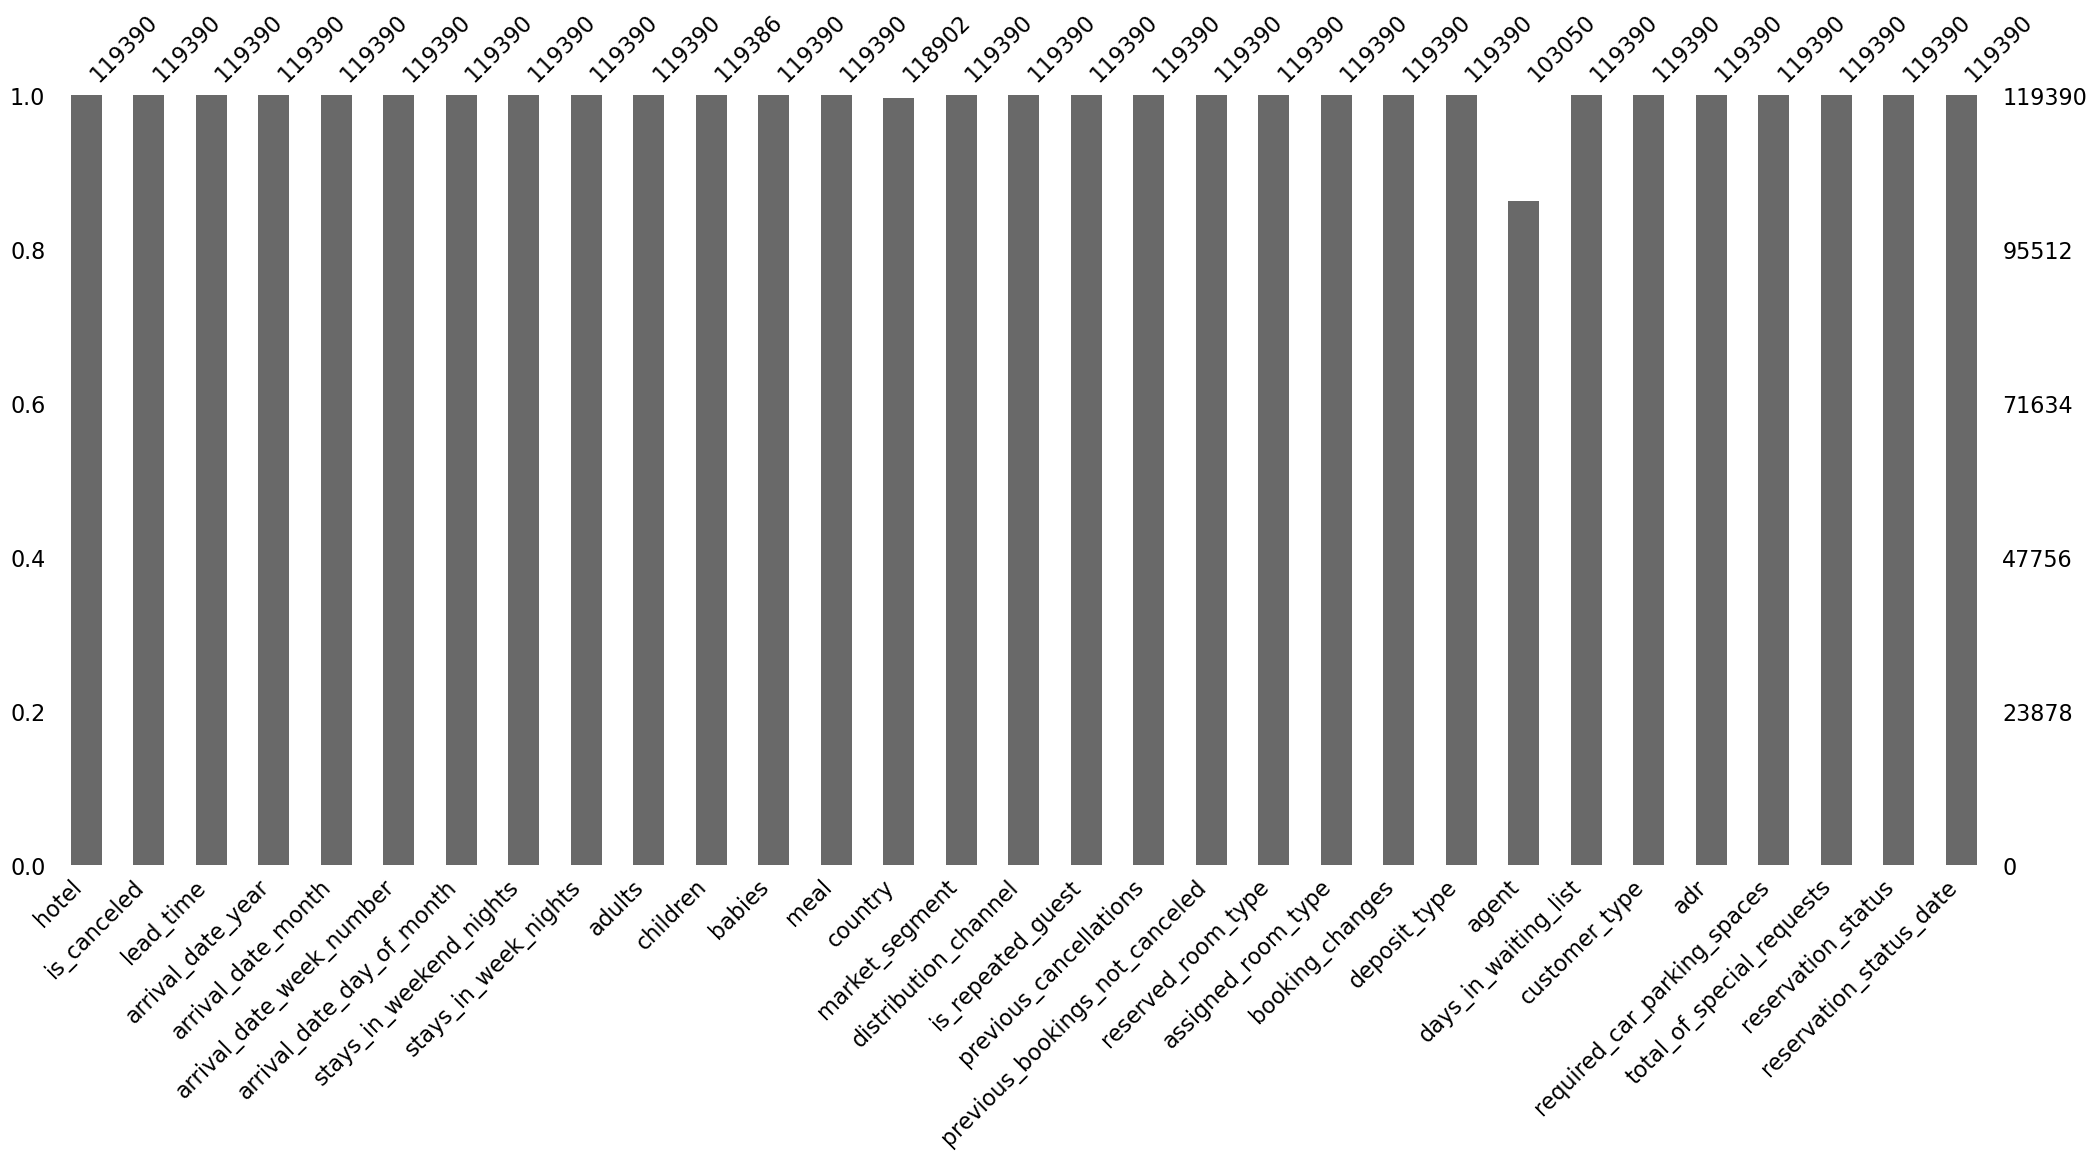

In [20]:
#Bar chart
#Bar chart displays a count of values present per columns ignoring missing values.
msno.bar(df)

In [21]:
#Here, we see that in each column we need to have 119390 data,
#but in columns agents, children, , country, we have some missing values

In [22]:
#Correlation heatmap
#Correlation heatmap measures nullity correlation between columns of the dataset i.e., 
#how strongly the presence or absence of one variable affects the presence of another.

<Axes: >

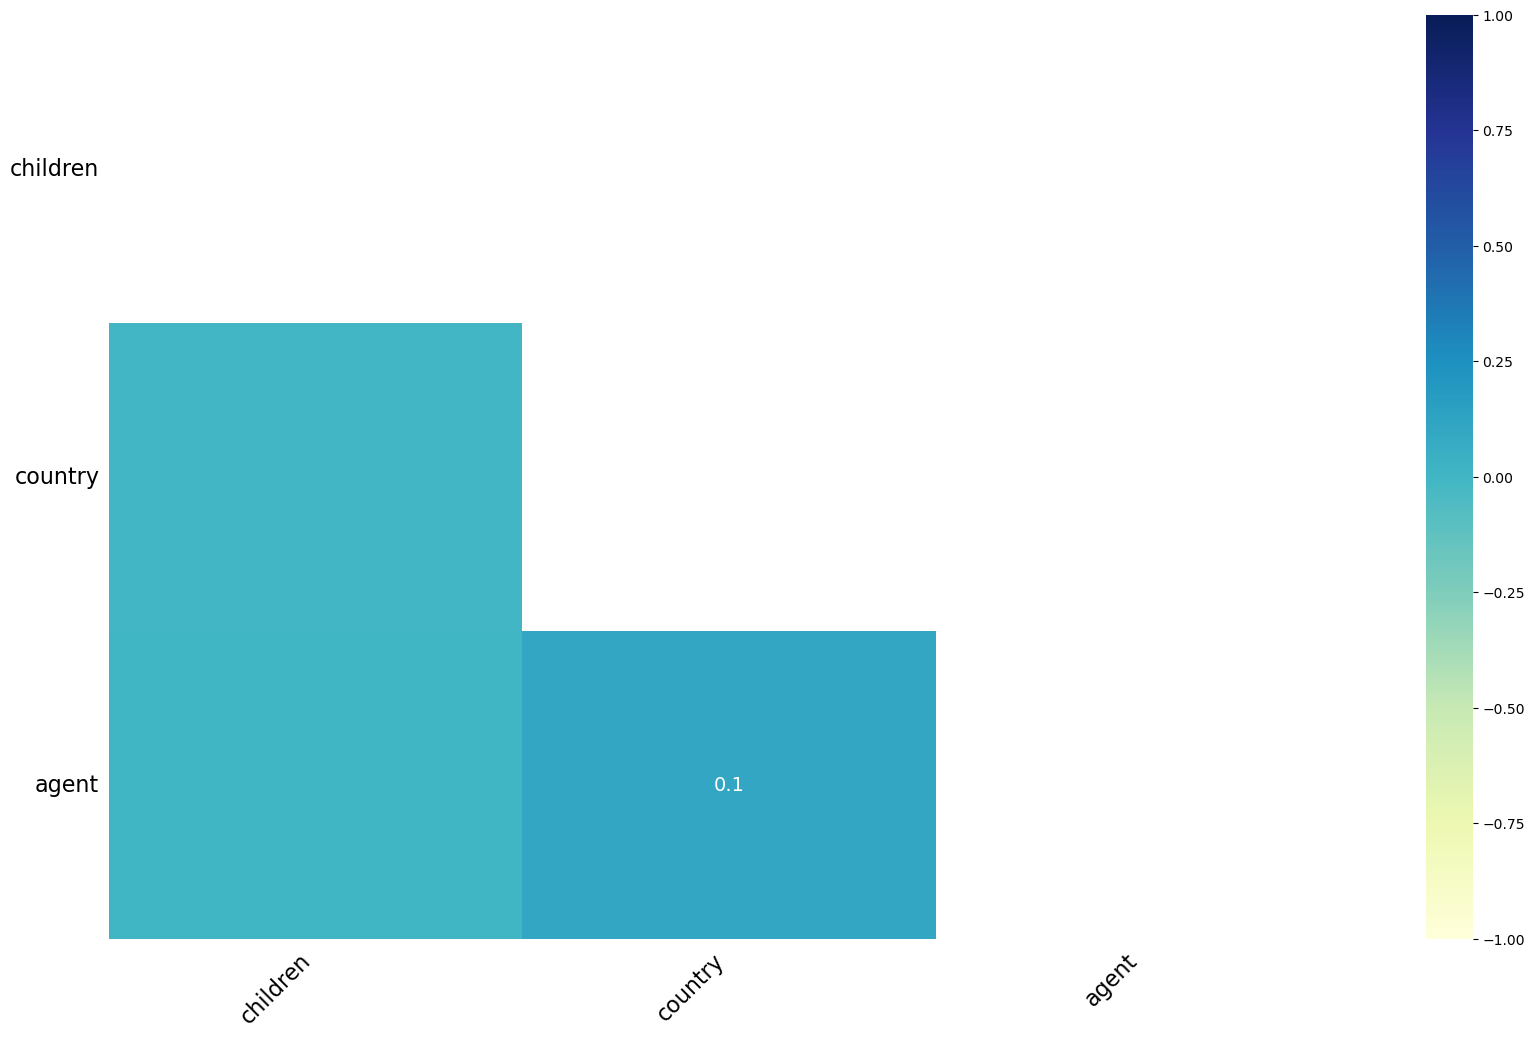

In [23]:
msno.heatmap(df, cmap='YlGnBu')

In [24]:

#Matrix
#It is the nullity matrix that allows us to see the distribution of data across all columns in the whole dataset.
#It also shows a sparkline (or, in some cases, a striped line) that emphasizes rows in a dataset with the highest and lowest nullity.

<Axes: >

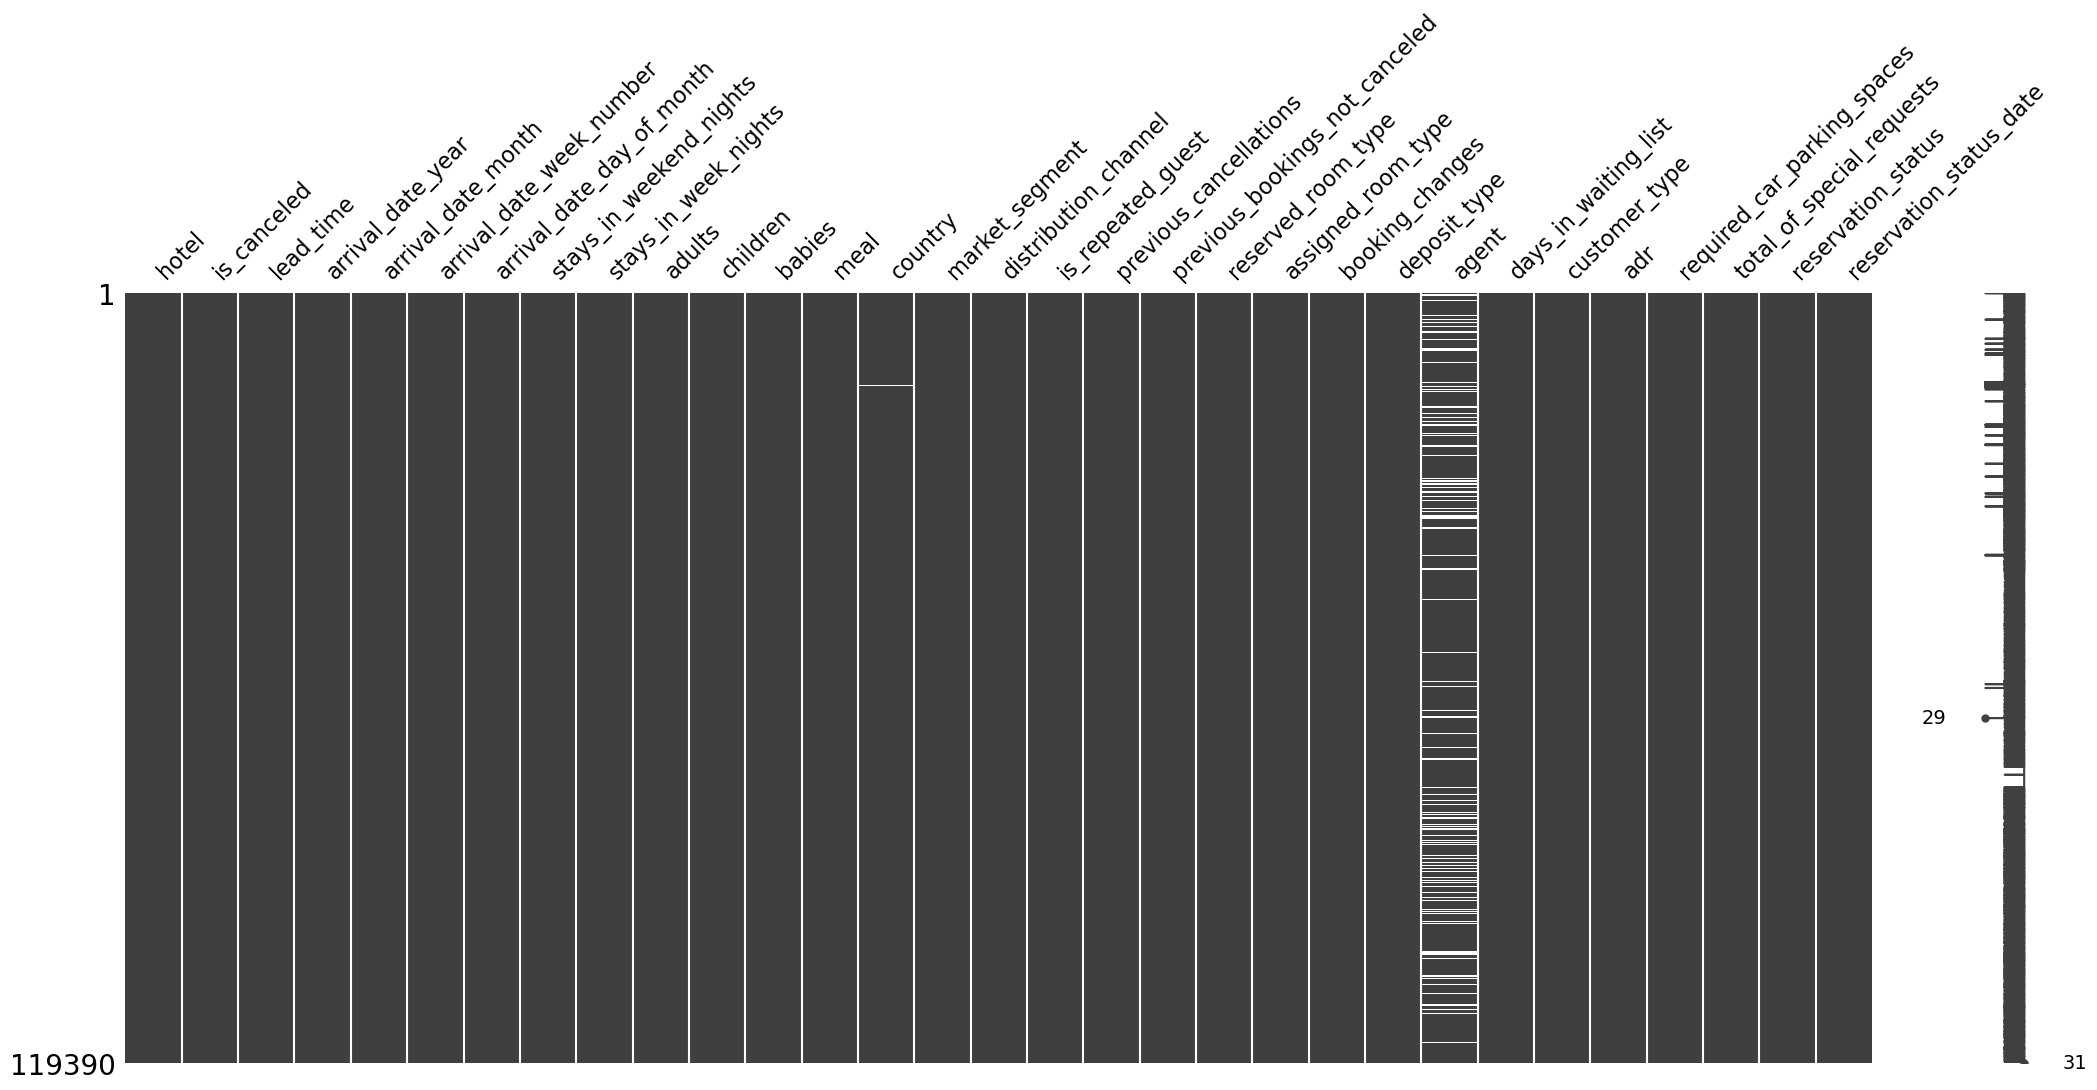

In [25]:
msno.matrix(df)

In [26]:
df.corr()

is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.293123           0.016660   
lead_time                          0.293123   1.000000           0.040142   
arrival_date_year                  0.016660   0.040142           1.000000   
arrival_date_week_number           0.008148   0.126871          -0.540561   
arrival_date_day_of_month         -0.006130   0.002268          -0.000221   
stays_in_weekend_nights           -0.001791   0.085671           0.021497   
stays_in_week_nights               0.024765   0.165799           0.030883   
adults                             0.060017   0.119519           0.029635   
children                           0.005048  -0.037622           0.054624   
babies                            -0.032491  -0.020915          -0.013192   
is_repeated_guest                 -0.084793  -0.124410           0.010341   
previous_cancellations             0.110133   0.086042          -0.119822   
previous_bookings_not_canceled    -0.057358  -0.073548           0.029218   
booking_changes                   -0.144381   0.000149           0.030872   
agent                             -0.083114  -0.069741           0.063457   
days_in_waiting_list               0.054186   0.170084          -0.056497   
adr                                0.047557  -0.063077           0.197580   
required_car_parking_spaces       -0.195498  -0.116451          -0.013684   
total_of_special_requests         -0.234658  -0.095712           0.108531   

                                arrival_date_week_number  \
is_canceled                                     0.008148   
lead_time                                       0.126871   
arrival_date_year                              -0.540561   
arrival_date_week_number                        1.000000   
arrival_date_day_of_month                       0.066809   
stays_in_weekend_nights                         0.018208   
stays_in_week_nights                            0.015558   
adults                                          0.025909   
children                                        0.005518   
babies                                          0.010395   
is_repeated_guest                              -0.030131   
previous_cancellations                          0.035501   
previous_bookings_not_canceled                 -0.020904   
booking_changes                                 0.005508   
agent                                          -0.031201   
days_in_waiting_list                            0.022933   
adr                                             0.075791   
required_car_parking_spaces                     0.001920   
total_of_special_requests                       0.026149   

                                arrival_date_day_of_month  \
is_canceled                                     -0.006130   
lead_time                                        0.002268   
arrival_date_year                               -0.000221   
arrival_date_week_number                         0.066809   
arrival_date_day_of_month                        1.000000   
stays_in_weekend_nights                         -0.016354   
stays_in_week_nights                            -0.028174   
adults                                          -0.001566   
children                                         0.014544   
babies                                          -0.000230   
is_repeated_guest                               -0.006145   
previous_cancellations                          -0.027011   
previous_bookings_not_canceled                  -0.000300   
booking_changes                                  0.010613   
agent                                            0.001487   
days_in_waiting_list                             0.022728   
adr                                              0.030245   
required_car_parking_spaces                      0.008683   
total_of_special_requests                        0.003062   

                                stays_in_weekend_nights  stays_in_wee

In [27]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
guest_city = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
guest_city.columns = ['Country', 'No of guests']
guest_city

Country  No of guests
0       PRT         21071
1       GBR          9676
2       FRA          8481
3       ESP          6391
4       DEU          6069
..      ...           ...
160     BHR             1
161     DJI             1
162     MLI             1
163     NPL             1
164     FRO             1

[165 rows x 2 columns]

In [29]:
import folium
from folium.plugins import HeatMap
import plotly.express as px

basemap = folium.Map()
guests_map = px.choropleth(guest_city, locations = guest_city['Country'],
                           color = guest_city['No of guests'], hover_name = guest_city['Country'])
guests_map.show()

In [30]:
df.fillna(0, inplace = True)

In [31]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [32]:
#Data preprocessing

In [33]:
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
filter

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [34]:
df[filter]

hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               2017   
116534    City Hotel            0          2               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409              October                        42   
3181             November                        47   
3684             December                        53   
3708             December                        53   
...                   ...                       ...   
115029               June                        26   
115091               June                        26   
116251               July                        28   
116534               July                        28   
117087               July                        30   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2224                            6                        0   
2409                           12                        0   
3181                           20                        1   
3684                           30                        1   
3708                           30                        2   
...                           ...                      ...   
115029                         27                        0   
115091                         30                        0   
116251                         15                        1   
116534                         15                        2   
117087                         27                        0   

        stays_in_week_nights  adults  ...  booking_changes  deposit_type  \
2224                       3       0  ...                1    No Deposit   
2409                       0       0  ...                0    No Deposit   
3181                       2       0  ...                0    No Deposit   
3684                       4       0  ...                1    No Deposit   
3708                       4       0  ...                1    No Deposit   
...                      ...     ...  ...              ...           ...   
115029                     3       0  ...                1    No Deposit   
115091                     1       0  ...                0    No Deposit   
116251                     1       0  ...                2    No Deposit   
116534                     5       0  ...                1    No Deposit   
117087                     2       0  ...                0    No Deposit   

        agent days_in_waiting_list    customer_type     adr  \
2224      0.0                    0  Transient-Party    0.00   
2409      0.0                    0        Transient    0.00   
3181     38.0                    0  Transient-Party    0.00   
3684    308.0                  122  Transient-Party    0.00   
3708    308.0                  122  Transient-Party    0.00   
...       ...                  ...              ...     ...   
115029    7.0                    0        Transient  100.80   
115091    0.0                    0        Transient    0.00   
116251  425.0                    0        Transient   73.80   
116534    9.0                    0  Transient-Party   22.86   
117087   52.0                    0        Transient    0.00   

        required_car_parking_spaces  total_of_special_requests  \
2224                              0                          0   
24

In [35]:
df=df[~filter] # returned the row for which children,adults and babies are not simultaneously zero

In [36]:
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  booking_changes  deposit_type  \
0                          0       2  ...                3    No Deposit   
1                          0       2  ...                4    No Deposit   
2                          1       1  ...                0    No Deposit   
3                          1       1  ...                0    No Deposit   
4                          2       2  ...                0    No Deposit   
...                      ...     ...  ...              ...           ...   
119385                     5       2  ...                0    No Deposit   
119386                     5       3  ...                0    No Deposit   
119387                     5       2  ...                0    No Deposit   
119388                     5       2  ...                0    No Deposit   
119389                     7       2  ...                0    No Deposit   

        agent days_in_waiting_list customer_type     adr  \
0         0.0                    0     Transient    0.00   
1         0.0                    0     Transient    0.00   
2         0.0                    0     Transient   75.00   
3       304.0                    0     Transient   75.00   
4       240.0                    0     Transient   98.00   
...       ...                  ...           ...     ...   
119385  394.0                    0     Transient   96.14   
119386    9.0                    0     Transient  225.43   
119387    9.0                    0     Transient  157.71   
119388   89.0                    0     Transient  104.40   
119389    9.0                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0   

In [37]:
#UNIVARIATE ANALYSIS (Checking the validity of assumptions)

In [38]:
is_can = len(df[df['is_canceled']==1])
print("Percentage cancelation= ", is_can/len(df))
df['reservation_status'].value_counts(normalize=True)*100

Percentage cancelation=  0.370765875346028


Check-Out    62.923412
Canceled     36.064927
No-Show       1.011660
Name: reservation_status, dtype: float64

In [39]:
corr= df.corr(method='pearson')['is_canceled'][:]
corr

is_canceled                       1.000000
lead_time                         0.292876
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month        -0.005948
stays_in_weekend_nights          -0.001323
stays_in_week_nights              0.025542
adults                            0.058182
children                          0.004851
babies                           -0.032569
is_repeated_guest                -0.083745
previous_cancellations            0.110139
previous_bookings_not_canceled   -0.057365
booking_changes                  -0.144832
agent                            -0.046770
days_in_waiting_list              0.054301
adr                               0.046492
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
Name: is_canceled, dtype: float64

In [40]:
#highest positive correlations : lead_time followed by previous_cancellations
#highest negative correlations : total_of_special_requests, required_car_parking_spaces

Cancelations in resort hotel=  0.27767373336329815
Cancelations in city hotel=  0.4178593534858457


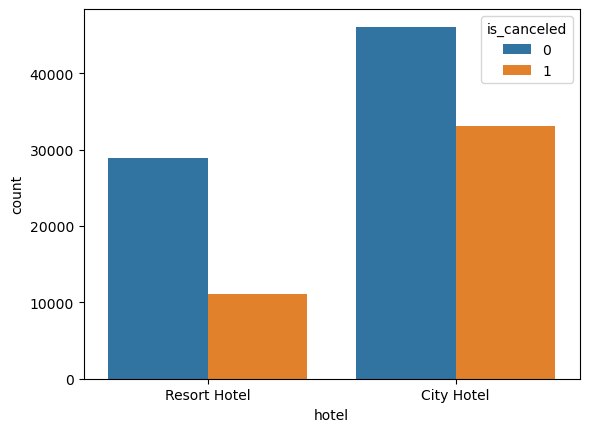

In [41]:
sns.countplot(data=df, x='hotel', hue='is_canceled')
resort_canceled = df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==1)]
city_canceled = df[(df['hotel']=='City Hotel') & (df['is_canceled']==1)]
print('Cancelations in resort hotel= ', (len(resort_canceled))/(len(df[df['hotel']=='Resort Hotel'])))
print('Cancelations in city hotel= ', (len(city_canceled))/(len(df[df['hotel']=='City Hotel'])))

In [42]:
#Our 1st assumption, city hotels have higher cancelation rate than resort hotels, is valid

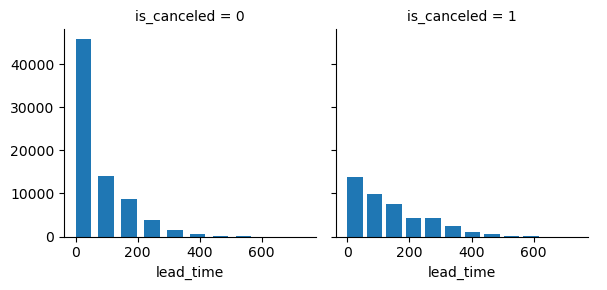

In [43]:
grid = sns.FacetGrid(df, col='is_canceled')
grid.map(plt.hist, 'lead_time', width=50)
grid.add_legend()

In [44]:
#Maximum cancelations occur if the booking is made 60-70 days before the checkin date. Longer the lead_time, lower is the cancelation. This invalidates our 2nd assumption.

In [45]:
print(len(df[(df['stays_in_weekend_nights']==0) & (df['stays_in_week_nights']==0)]))

645


In [46]:
#645 bookings don't have both weekday or weekend nights which could be ar error in the data as this is not possible in real life scenario.
#Therefore these rows can be eliminated from the dataset

Cancelations among new guests=  0.37806071629639254
Cancelations among old guests=  0.14647137150466044


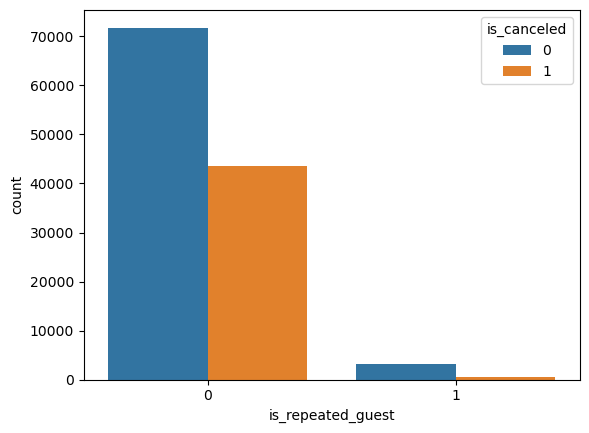

In [47]:
sns.countplot(data=df, x='is_repeated_guest', hue='is_canceled')
new_guest = df[(df['is_repeated_guest']==0) & (df['is_canceled']==1)]
old_guest = df[(df['is_repeated_guest']==1) & (df['is_canceled']==1)]
print('Cancelations among new guests= ', (len(new_guest))/(len(df[df['is_repeated_guest']==0])))
print('Cancelations among old guests= ', (len(old_guest))/(len(df[df['is_repeated_guest']==1])))

In [48]:
#As seen in the correlation table, the above graph bolsters the evidence that maximum customers are new comers and
#they are less likely to cancel their current booking. Old guests are less likely to cancel the booking (14%). Assumption 5 holds true.

<Axes: xlabel='previous_cancellations', ylabel='count'>

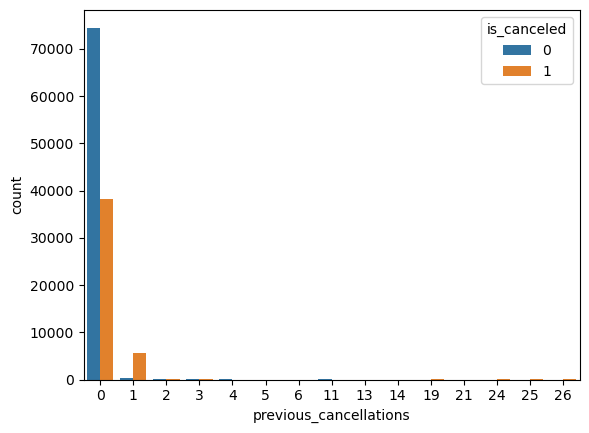

In [49]:
sns.countplot(data=df, x='previous_cancellations', hue='is_canceled')

In [50]:
#Maximum customers have 0 previous cancellations. They are less likely to cancel the current booking. However, 
#customers who have cancelled once earlier are more likely to cancel the current booking.
#This also matches with the positive correlation between previous_cancellations and is_cancelled and supports Assumption 6

In [51]:
temp = df.loc[df['reserved_room_type']!=df['assigned_room_type']]
temp['is_canceled'].value_counts(normalize=True)*100

0    94.586375
1     5.413625
Name: is_canceled, dtype: float64

In [52]:
#Assumption 7 that there more cancellations when assigned room type is different from reserved room type is not valid.
#There are only 5% cancellations in such a case.

<Axes: xlabel='deposit_type', ylabel='count'>

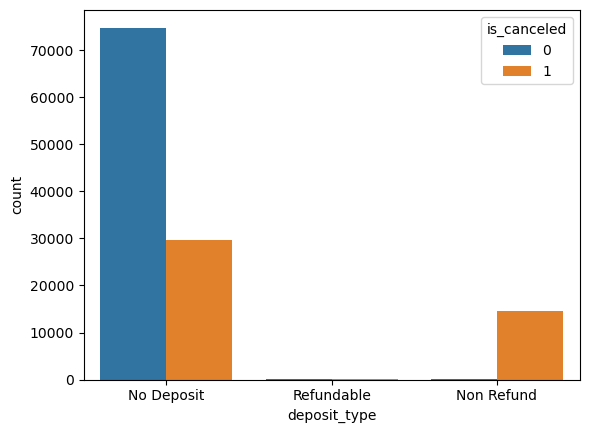

In [53]:
sns.countplot(x="deposit_type", hue="is_canceled",data=df)

In [54]:
#Contrary to assumption 9, bookings that are non_refundable are canceled


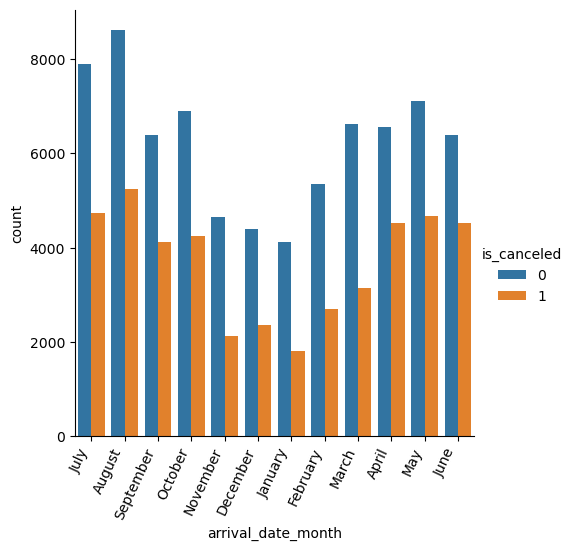

In [55]:
chart = sns.catplot(data=df, x='arrival_date_month', hue='is_canceled', kind='count')
chart.set_xticklabels(rotation=65, horizontalalignment='right')

<Axes: xlabel='arrival_date_year', ylabel='count'>

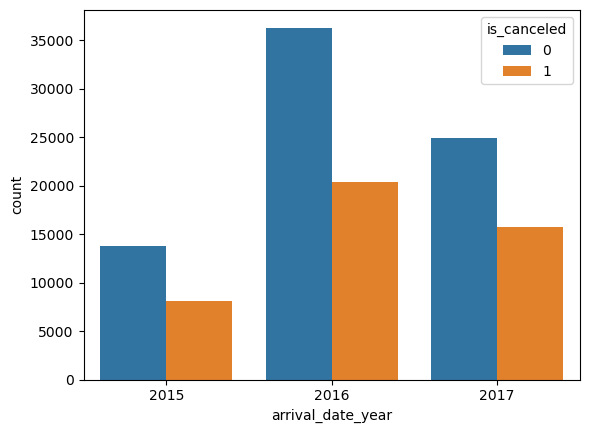

In [56]:
sns.countplot(data=df, x='arrival_date_year', hue='is_canceled')

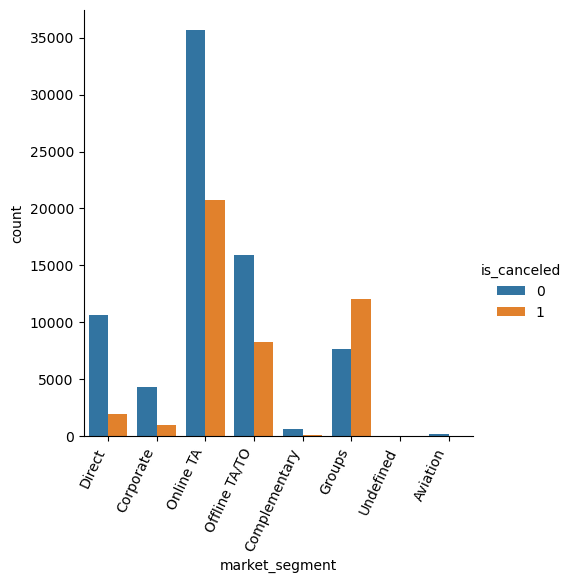

In [57]:
chart = sns.catplot(data=df, x='market_segment', kind='count', hue='is_canceled')
chart.set_xticklabels(rotation=65, horizontalalignment='right')

Transient          75.057462
Transient-Party    21.045214
Contract            3.415821
Group               0.481503
Name: customer_type, dtype: float64


<Axes: xlabel='customer_type', ylabel='count'>

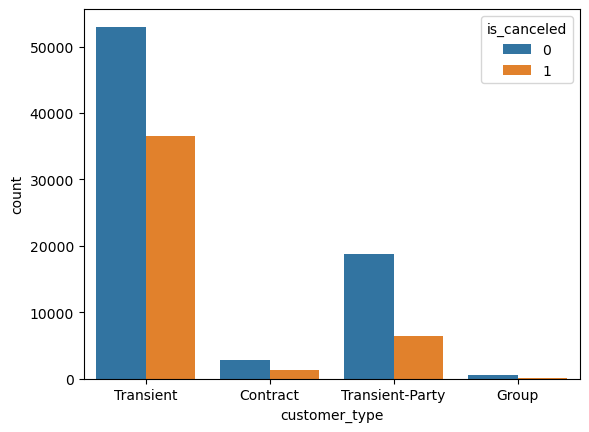

In [58]:
print(df['customer_type'].value_counts(normalize=True)*100)
sns.countplot(data=df, x='customer_type', hue='is_canceled')

In [59]:
#MULTIVARIATE ANALYSIS


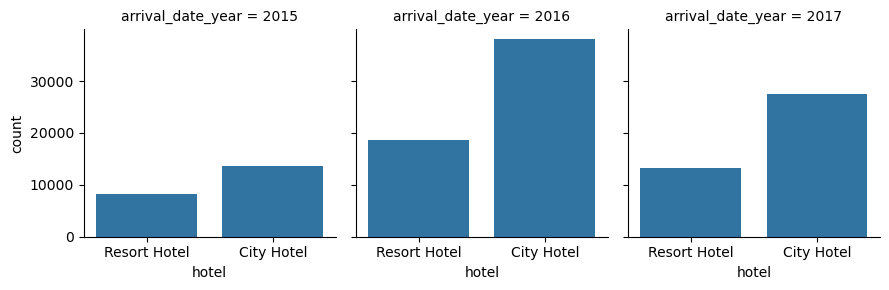

In [60]:
grid = sns.FacetGrid(df, col='arrival_date_year')
grid.map(sns.countplot, 'hotel')

In [61]:
#Feature engineering

In [62]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [63]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

arrival_date_month         adr
0               April   75.867816
1              August  181.205892
2            December   68.410104
3            February   54.147478
4             January   48.761125
5                July  150.122528
6                June  107.974850
7               March   57.056838
8                 May   76.657558
9            November   48.706289
10            October   61.775449
11          September   96.416860

In [64]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel


arrival_date_month         adr
0               April  111.962267
1              August  118.674598
2            December   88.401855
3            February   86.520062
4             January   82.330983
5                July  115.818019
6                June  117.874360
7               March   90.658533
8                 May  120.669827
9            November   86.946592
10            October  102.004672
11          September  112.776582

In [65]:
!pip install sort-dataframeby-monthorweek

Defaulting to user installation because normal site-packages is not writeable


In [66]:
!pip install sorted-months-weekdays

Defaulting to user installation because normal site-packages is not writeable


In [67]:
import sort_dataframeby_monthorweek as sd

In [68]:
def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

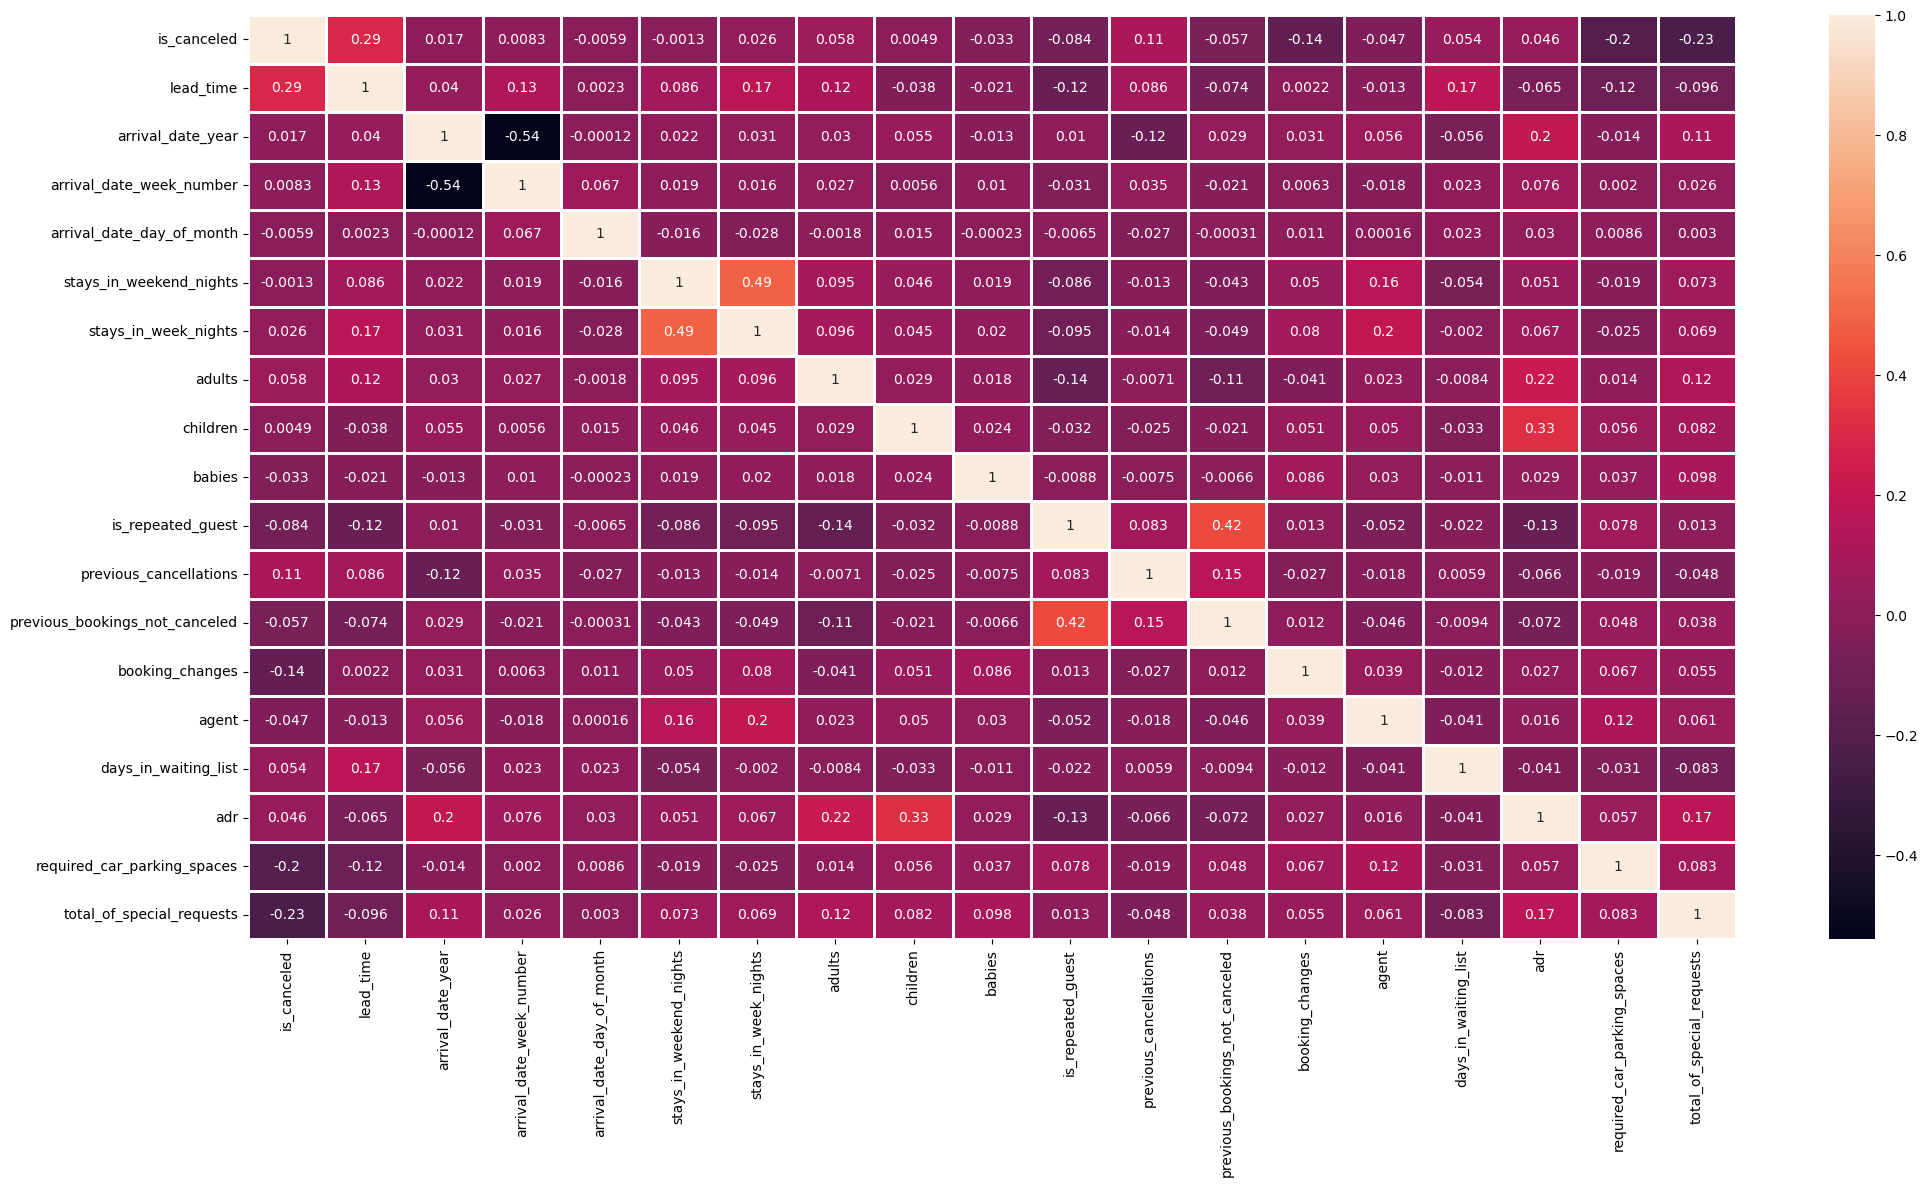

In [69]:
plt.figure(figsize = (24, 12))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [70]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [71]:
# dropping columns that are not useful

useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

df.drop(useless_col, axis = 1, inplace = True)

In [72]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols
cat_df = df[cat_cols]
cat_df.head(50)

hotel arrival_date_month meal market_segment distribution_channel  \
0   Resort Hotel               July   BB         Direct               Direct   
1   Resort Hotel               July   BB         Direct               Direct   
2   Resort Hotel               July   BB         Direct               Direct   
3   Resort Hotel               July   BB      Corporate            Corporate   
4   Resort Hotel               July   BB      Online TA                TA/TO   
5   Resort Hotel               July   BB      Online TA                TA/TO   
6   Resort Hotel               July   BB         Direct               Direct   
7   Resort Hotel               July   FB         Direct               Direct   
8   Resort Hotel               July   BB      Online TA                TA/TO   
9   Resort Hotel               July   HB  Offline TA/TO                TA/TO   
10  Resort Hotel               July   BB      Online TA                TA/TO   
11  Resort Hotel               July   HB      Online TA                TA/TO   
12  Resort Hotel               July   BB      Online TA                TA/TO   
13  Resort Hotel               July   HB      Online TA                TA/TO   
14  Resort Hotel               July   BB      Online TA                TA/TO   
15  Resort Hotel               July   BB      Online TA                TA/TO   
16  Resort Hotel               July   BB  Offline TA/TO                TA/TO   
17  Resort Hotel               July   BB      Online TA                TA/TO   
18  Resort Hotel               July   BB      Corporate            Corporate   
19  Resort Hotel               July   BB         Direct               Direct   
20  Resort Hotel               July   BB      Online TA                TA/TO   
21  Resort Hotel               July   BB         Direct               Direct   
22  Resort Hotel               July   BB         Direct               Direct   
23  Resort Hotel               July   BB         Direct               Direct   
24  Resort Hotel               July   HB  Offline TA/TO                TA/TO   
25  Resort Hotel               July   BB  Offline TA/TO                TA/TO   
26  Resort Hotel               July   BB  Offline TA/TO                TA/TO   
27  Resort Hotel               July   BB      Online TA                TA/TO   
28  Resort Hotel               July   BB      Online TA                TA/TO   
29  Resort Hotel               July   BB      Online TA                TA/TO   
30  Resort Hotel               July   BB         Direct               Direct   
31  Resort Hotel               July   BB  Offline TA/TO                TA/TO   
32  Resort Hotel               July   BB         Direct               Direct   
33  Resort Hotel               July   BB  Offline TA/TO                TA/TO   
34  Resort Hotel               July   BB      Online TA                TA/TO   
35  Resort Hotel               July   BB      Online TA                TA/TO   
36  Resort Hotel               July   BB      Online TA                TA/TO   
37  Resort Hotel               July   BB      Online TA                TA/TO   
38  Resort Hotel               July   BB      Online TA                TA/TO   
39  Resort Hotel               July   HB         Direct               Direct   
40  Resort Hotel               July   BB      Online TA                TA/TO   
41  Resort Hotel               July   BB  Offline TA/TO                TA/TO   
42  Resort Hotel               July   BB         Direct               Direct   
43  Resort Hotel               July   HB         Direct               Direct   
44  Resort Hotel               July   BB      Online TA                TA/TO   
45  Resort Hotel               July   BB      Online TA                TA/TO   
46  Resort Hotel               July   BB  Offline TA/TO                TA/TO   
47  Resort Hotel               July   BB  Offline TA/TO                TA/TO   
48  Resort Hotel               July   HB  Offline TA/TO                TA/TO   
49  Resort 

In [73]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day
cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)
cat_df.head()

hotel meal market_segment distribution_channel reserved_room_type  \
0  Resort Hotel   BB         Direct               Direct                  C   
1  Resort Hotel   BB         Direct               Direct                  C   
2  Resort Hotel   BB         Direct               Direct                  A   
3  Resort Hotel   BB      Corporate            Corporate                  A   
4  Resort Hotel   BB      Online TA                TA/TO                  A   

  deposit_type customer_type  year  month  day  
0   No Deposit     Transient  2015      7    1  
1   No Deposit     Transient  2015      7    1  
2   No Deposit     Transient  2015      7    2  
3   No Deposit     Transient  2015      7    2  
4   No Deposit     Transient  2015      7    3

In [74]:
# encoding categorical variables

cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

In [75]:
cat_df.head()

hotel  meal  market_segment  distribution_channel  reserved_room_type  \
0      0     0               0                     0                   0   
1      0     0               0                     0                   0   
2      0     0               0                     0                   1   
3      0     0               1                     1                   1   
4      0     0               2                     2                   1   

   deposit_type  customer_type  year  month  day  
0             0              0     0      7    1  
1             0              0     0      7    1  
2             0              0     0      7    2  
3             0              0     0      7    2  
4             0              0     0      7    3

In [76]:
num_df = df.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
0             342                        27                          1   
1             737                        27                          1   
2               7                        27                          1   
3              13                        27                          1   
4              14                        27                          1   
...           ...                       ...                        ...   
119385         23                        35                         30   
119386        102                        35                         31   
119387         34                        35                         31   
119388        109                        35                         31   
119389        205                        35                         29   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
0                             0                     0       2       0.0   
1                             0                     0       2       0.0   
2                             0                     1       1       0.0   
3                             0                     1       1       0.0   
4                             0                     2       2       0.0   
...                         ...                   ...     ...       ...   
119385                        2                     5       2       0.0   
119386                        2                     5       3       0.0   
119387                        2                     5       2       0.0   
119388                        2                     5       2       0.0   
119389                        2                     7       2       0.0   

        babies  is_repeated_guest  previous_cancellations  \
0            0                  0                       0   
1            0                  0                       0   
2            0                  0                       0   
3            0                  0                       0   
4            0                  0                       0   
...        ...                ...                     ...   
119385       0                  0                       0   
119386       0                  0                       0   
119387       0                  0                       0   
119388       0                  0                       0   
119389       0                  0                       0   

        previous_bookings_not_canceled  agent     adr  \
0                                    0    0.0    0.00   
1                                    0    0.0    0.00   
2                                    0    0.0   75.00   
3                                    0  304.0   75.00   
4                                    0  240.0   98.00   
...                                ...    ...     ...   
119385                               0  394.0   96.14   
119386                               0    9.0  225.43   
119387                               0    9.0  157.71   
119388                               0   89.0  104.40   
119389                               0    9.0  151.20   

        required_car_parking_spaces  total_of_special_requests  
0                                 0                          0  
1                                 0                          0  
2                                 0                          0  
3                                 0                          0  
4                                 0                          1  
...                             ...                        ...  
119385                            0                          0  
119386                            0                          2  
119387                            0                          4  
119388                            0                          0  
119389                            0                          2  

[119210 rows x 15 c

In [77]:
num_df.var()

lead_time                         11422.361808
arrival_date_week_number            184.990111
arrival_date_day_of_month            77.107192
stays_in_weekend_nights               0.990258
stays_in_week_nights                  3.599010
adults                                0.330838
children                              0.159070
babies                                0.009508
is_repeated_guest                     0.030507
previous_cancellations                0.713887
previous_bookings_not_canceled        2.244415
agent                             11485.169679
adr                                2543.589039
required_car_parking_spaces           0.060201
total_of_special_requests             0.628652
dtype: float64

In [78]:
num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)

num_df['adr'] = np.log(num_df['adr'] + 1)

In [79]:
X = pd.concat([cat_df, num_df], axis=1, join='inner')
y = df['is_canceled']

In [80]:
X

hotel  meal  market_segment  distribution_channel  reserved_room_type  \
0           0     0               0                     0                   0   
1           0     0               0                     0                   0   
2           0     0               0                     0                   1   
3           0     0               1                     1                   1   
4           0     0               2                     2                   1   
...       ...   ...             ...                   ...                 ...   
119385      1     0               3                     2                   1   
119386      1     0               2                     2                   3   
119387      1     0               2                     2                   2   
119388      1     0               2                     2                   1   
119389      1     2               2                     2                   1   

        deposit_type  customer_type  year  month  day  ...  adults  children  \
0                  0              0     0      7    1  ...       2       0.0   
1                  0              0     0      7    1  ...       2       0.0   
2                  0              0     0      7    2  ...       1       0.0   
3                  0              0     0      7    2  ...       1       0.0   
4                  0              0     0      7    3  ...       2       0.0   
...              ...            ...   ...    ...  ...  ...     ...       ...   
119385             0              0     3      9    6  ...       2       0.0   
119386             0              0     3      9    7  ...       3       0.0   
119387             0              0     3      9    7  ...       2       0.0   
119388             0              0     3      9    7  ...       2       0.0   
119389             0              0     3      9    7  ...       2       0.0   

        babies  is_repeated_guest  previous_cancellations  \
0            0                  0                       0   
1            0                  0                       0   
2            0                  0                       0   
3            0                  0                       0   
4            0                  0                       0   
...        ...                ...                     ...   
119385       0                  0                       0   
119386       0                  0                       0   
119387       0                  0                       0   
119388       0                  0                       0   
119389       0                  0                       0   

        previous_bookings_not_canceled     agent       adr  \
0                                    0  0.000000  0.000000   
1                                    0  0.000000  0.000000   
2                                    0  0.000000  4.330733   
3                                    0  5.720312  4.330733   
4                                    0  5.484797  4.595120   
...                                ...       ...       ...   
119385                               0  5.978886  4.576153   
119386                               0  2.302585  5.422436   
119387                               0  2.302585  5.067079   
119388                               0  4.499810  4.657763   
119389                               0  2.302585  5.025195   

        required_car_parking_spaces  total_of_special_requests  
0                                 0                          0  
1                                 0                          0  
2                                 0                          0  
3                                 0                          0  
4                                 0                          1  
...                             ...                        ...  
119385                            0                          0  
119386                            0                          2  
119387     

In [81]:
#model

In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [83]:
X.fillna(0, inplace = True)

In [84]:
X

hotel  meal  market_segment  distribution_channel  reserved_room_type  \
0           0     0               0                     0                   0   
1           0     0               0                     0                   0   
2           0     0               0                     0                   1   
3           0     0               1                     1                   1   
4           0     0               2                     2                   1   
...       ...   ...             ...                   ...                 ...   
119385      1     0               3                     2                   1   
119386      1     0               2                     2                   3   
119387      1     0               2                     2                   2   
119388      1     0               2                     2                   1   
119389      1     2               2                     2                   1   

        deposit_type  customer_type  year  month  day  ...  adults  children  \
0                  0              0     0      7    1  ...       2       0.0   
1                  0              0     0      7    1  ...       2       0.0   
2                  0              0     0      7    2  ...       1       0.0   
3                  0              0     0      7    2  ...       1       0.0   
4                  0              0     0      7    3  ...       2       0.0   
...              ...            ...   ...    ...  ...  ...     ...       ...   
119385             0              0     3      9    6  ...       2       0.0   
119386             0              0     3      9    7  ...       3       0.0   
119387             0              0     3      9    7  ...       2       0.0   
119388             0              0     3      9    7  ...       2       0.0   
119389             0              0     3      9    7  ...       2       0.0   

        babies  is_repeated_guest  previous_cancellations  \
0            0                  0                       0   
1            0                  0                       0   
2            0                  0                       0   
3            0                  0                       0   
4            0                  0                       0   
...        ...                ...                     ...   
119385       0                  0                       0   
119386       0                  0                       0   
119387       0                  0                       0   
119388       0                  0                       0   
119389       0                  0                       0   

        previous_bookings_not_canceled     agent       adr  \
0                                    0  0.000000  0.000000   
1                                    0  0.000000  0.000000   
2                                    0  0.000000  4.330733   
3                                    0  5.720312  4.330733   
4                                    0  5.484797  4.595120   
...                                ...       ...       ...   
119385                               0  5.978886  4.576153   
119386                               0  2.302585  5.422436   
119387                               0  2.302585  5.067079   
119388                               0  4.499810  4.657763   
119389                               0  2.302585  5.025195   

        required_car_parking_spaces  total_of_special_requests  
0                                 0                          0  
1                                 0                          0  
2                                 0                          0  
3                                 0                          0  
4                                 0                          1  
...                             ...                        ...  
119385                            0                          0  
119386                            0                          2  
119387     

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [86]:
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119210, dtype: int64

In [87]:
#logistic regression


In [88]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : n{conf}")
print(f"Classification Report : n{clf_report}")

Accuracy Score of Logistic Regression is : 0.8099991611441993
Confusion Matrix : n[[21284  1176]
 [ 5619  7684]]
Classification Report : n              precision    recall  f1-score   support

           0       0.79      0.95      0.86     22460
           1       0.87      0.58      0.69     13303

    accuracy                           0.81     35763
   macro avg       0.83      0.76      0.78     35763
weighted avg       0.82      0.81      0.80     35763



In [89]:
#Logistic Regression using stratified k-folds cross validation
#Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score

cross_val_score_lr=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),X,y,cv=5)
print(cross_val_score_lr)
print("Avg :",np.average(cross_val_score_lr))


[0.69276906 0.60078852 0.72581998 0.78240081 0.70698767]
Avg : 0.7017532086234375


In [91]:
#knn model

In [92]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : n{conf}")
print(f"Classification Report : n{clf_report}")

Accuracy Score of KNN is : 0.8905852417302799
Confusion Matrix : n[[21635   825]
 [ 3088 10215]]
Classification Report : n              precision    recall  f1-score   support

           0       0.88      0.96      0.92     22460
           1       0.93      0.77      0.84     13303

    accuracy                           0.89     35763
   macro avg       0.90      0.87      0.88     35763
weighted avg       0.89      0.89      0.89     35763



In [93]:
#decision tree

In [94]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : n{conf}")
print(f"Classification Report : n{clf_report}")

Accuracy Score of Decision Tree is : 0.9484103682576965
Confusion Matrix : n[[21549   911]
 [  934 12369]]
Classification Report : n              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22460
           1       0.93      0.93      0.93     13303

    accuracy                           0.95     35763
   macro avg       0.94      0.94      0.94     35763
weighted avg       0.95      0.95      0.95     35763



In [95]:
#random forest

In [96]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : n{conf}")
print(f"Classification Report : n{clf_report}")

Accuracy Score of Random Forest is : 0.9543382825825574
Confusion Matrix : n[[22276   184]
 [ 1449 11854]]
Classification Report : n              precision    recall  f1-score   support

           0       0.94      0.99      0.96     22460
           1       0.98      0.89      0.94     13303

    accuracy                           0.95     35763
   macro avg       0.96      0.94      0.95     35763
weighted avg       0.96      0.95      0.95     35763



In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score

score_rf=cross_val_score(RandomForestClassifier(n_estimators=40),X, y,cv=10)
print(score_rf)
print('Avg :',np.average(score_rf))

[0.77065682 0.62083718 0.67636943 0.54710175 0.5881218  0.64449291
 0.60632497 0.48938847 0.44660683 0.54827615]
Avg : 0.5938176327489304


In [97]:
#The given dataset is a supervised classification dataset. 
#It holds booking information for a city hotel and a resort hotel with information such as How and when the booking was made, 
#the length of passengers’ stay with the number of parking slots available, the number of adults, children, and babies.
#The Logistic regression, K-Nearest Neighbor, Decision Tree, Random Forest algorithms are used to handle this supervised classification model. 
#Among these four machine learning algorithms, Random forest and Decision trees perform well with respect to accuracy